<a href="https://colab.research.google.com/github/alvaphelan/Python-HowTos/blob/main/Curve_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fitting curves to data

Another important function is curve_fit which can be used in order to fit lines and curves to data. This is useful when comparing theoretical and experimental values.

### How it works

First, you must import the curve fit function from scipy

In [17]:
from scipy.optimize import curve_fit

import numpy as np
import matplotlib.pyplot as plt

In [18]:
#creating x and y to work with
x = np.linspace(-50, 50, 40)
y = 6*x -4 

Then, you must define the function you want to fit to the data. In this example, we will go through a simple straight linear line but this can be done with quadratics, exponentials etc. 

In [19]:
def func(x, m, c):
    y = m*x + c
    return y

Taking m as the slope and c as the intercept, this is the generic form for a straight line. 

Then, it is time to use curve_fit. This will provide you with two matrices, popt and pcov.

In [20]:
popt, pcov = curve_fit(func, x, y)

Popt is an array with the optimum parameters for the function (m and c in this case), and they are in the same order as defined in the function. They can be accessed by the following (*as explained in section regarding [numpy](https://github.com/UCD-Physics/Python-HowTos/blob/main/Numpy.ipynb)*)

In [21]:
m = popt[0]
c = popt[1]
print(f"The optimum slope for this function is {m} and intercept is {c}")

The optimum slope for this function is 6.0 and intercept is -3.999999999999995


Pcov returns the covariance matrix (explained in more detail [here](https://veritas.ucd.ie/~apl/labs_master/docs/2020/DA/Error_Propagation.pdf)), but simply the errors on the parameters are the square root of the diagonal elements of the matrix, in this case

In [22]:
m_error = np.sqrt(pcov[0, 0])
c_error = np.sqrt(pcov[1, 1])


It is then possible to create a yfit to this function

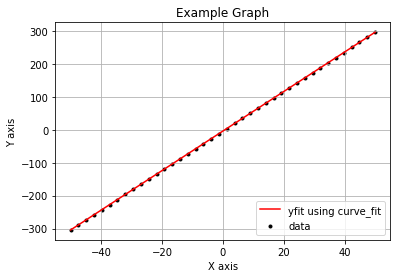

In [24]:
yfit = popt[0]*x + popt[1]

#and can then graph the data and yfit
plt.scatter(x, y, marker = '.', color = 'black', label = 'data')
plt.plot(x, yfit, color = 'red', label = 'yfit using curve_fit')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Example Graph')
plt.grid(True)
plt.legend(loc = 'lower right');

The curve_fit function has an option to include errors in the calculation in order to increase the accuracy of the slope and interncept as seen in the error bar section [here](https://github.com/UCD-Physics/Python-HowTos/blob/main/Error_Bars.ipynb).

Curve fit can be used for any type of function, in the next example we will cover an exponential decay. First we'll import data (as seen in [this section](https://github.com/UCD-Physics/Python-HowTos/blob/main/Importing_Data.ipynb)).

In [25]:
x_data, y_data = np.loadtxt('exp_data.txt', unpack = True)

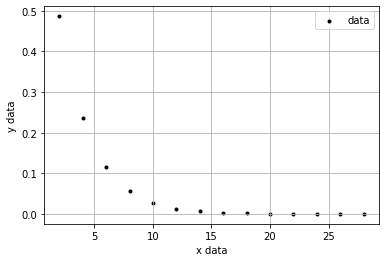

In [27]:
#plot the raw data
plt.scatter(x_data, y_data, marker ='.', color = 'black', label = 'data')
plt.grid(True)
plt.xlabel('x data')
plt.ylabel('y data')
plt.legend(loc = 'upper right');

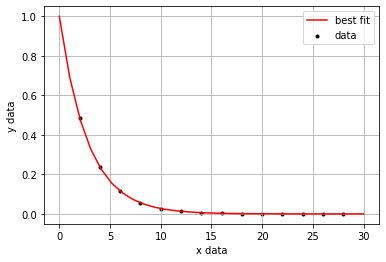

In [28]:
#then define function for best fit
#use generic function for exponential decay

def func(x, a):
  return np.exp(a*x)

#use curve_fit
popt, pcov = curve_fit(func, x_data, y_data)
a1 = popt[0]
a1_error = pcov[0, 0]

#best fit

#creating same x interval to include in y fit
x = np.linspace(0, 30, 30)
y_fit = np.exp(a1*x)
plt.plot(x, y_fit, color = 'red', label = 'best fit')
#original plot
plt.scatter(x_data, y_data, marker ='.', color = 'black', label = 'data')
plt.grid(True)
plt.xlabel('x data')
plt.ylabel('y data')
plt.legend(loc = 'upper right');
